# House Price Prediction Model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [175]:

HouseDF =pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")
HouseDF .head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [122]:
HouseDF=HouseDF.reset_index()
HouseDF.head()


,index,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [124]:

HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2919 non-null   int64  
 1   Id            2919 non-null   int64  
 2   MSSubClass    2919 non-null   int64  
 3   MSZoning      2915 non-null   object 
 4   LotArea       2919 non-null   int64  
 5   LotConfig     2919 non-null   object 
 6   BldgType      2919 non-null   object 
 7   OverallCond   2919 non-null   int64  
 8   YearBuilt     2919 non-null   int64  
 9   YearRemodAdd  2919 non-null   int64  
 10  Exterior1st   2918 non-null   object 
 11  BsmtFinSF2    2918 non-null   float64
 12  TotalBsmtSF   2918 non-null   float64
 13  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(7), object(4)
memory usage: 319.4+ KB


In [126]:

HouseDF.describe()

,index,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [128]:
HouseDF.columns

Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig',
       'BldgType', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

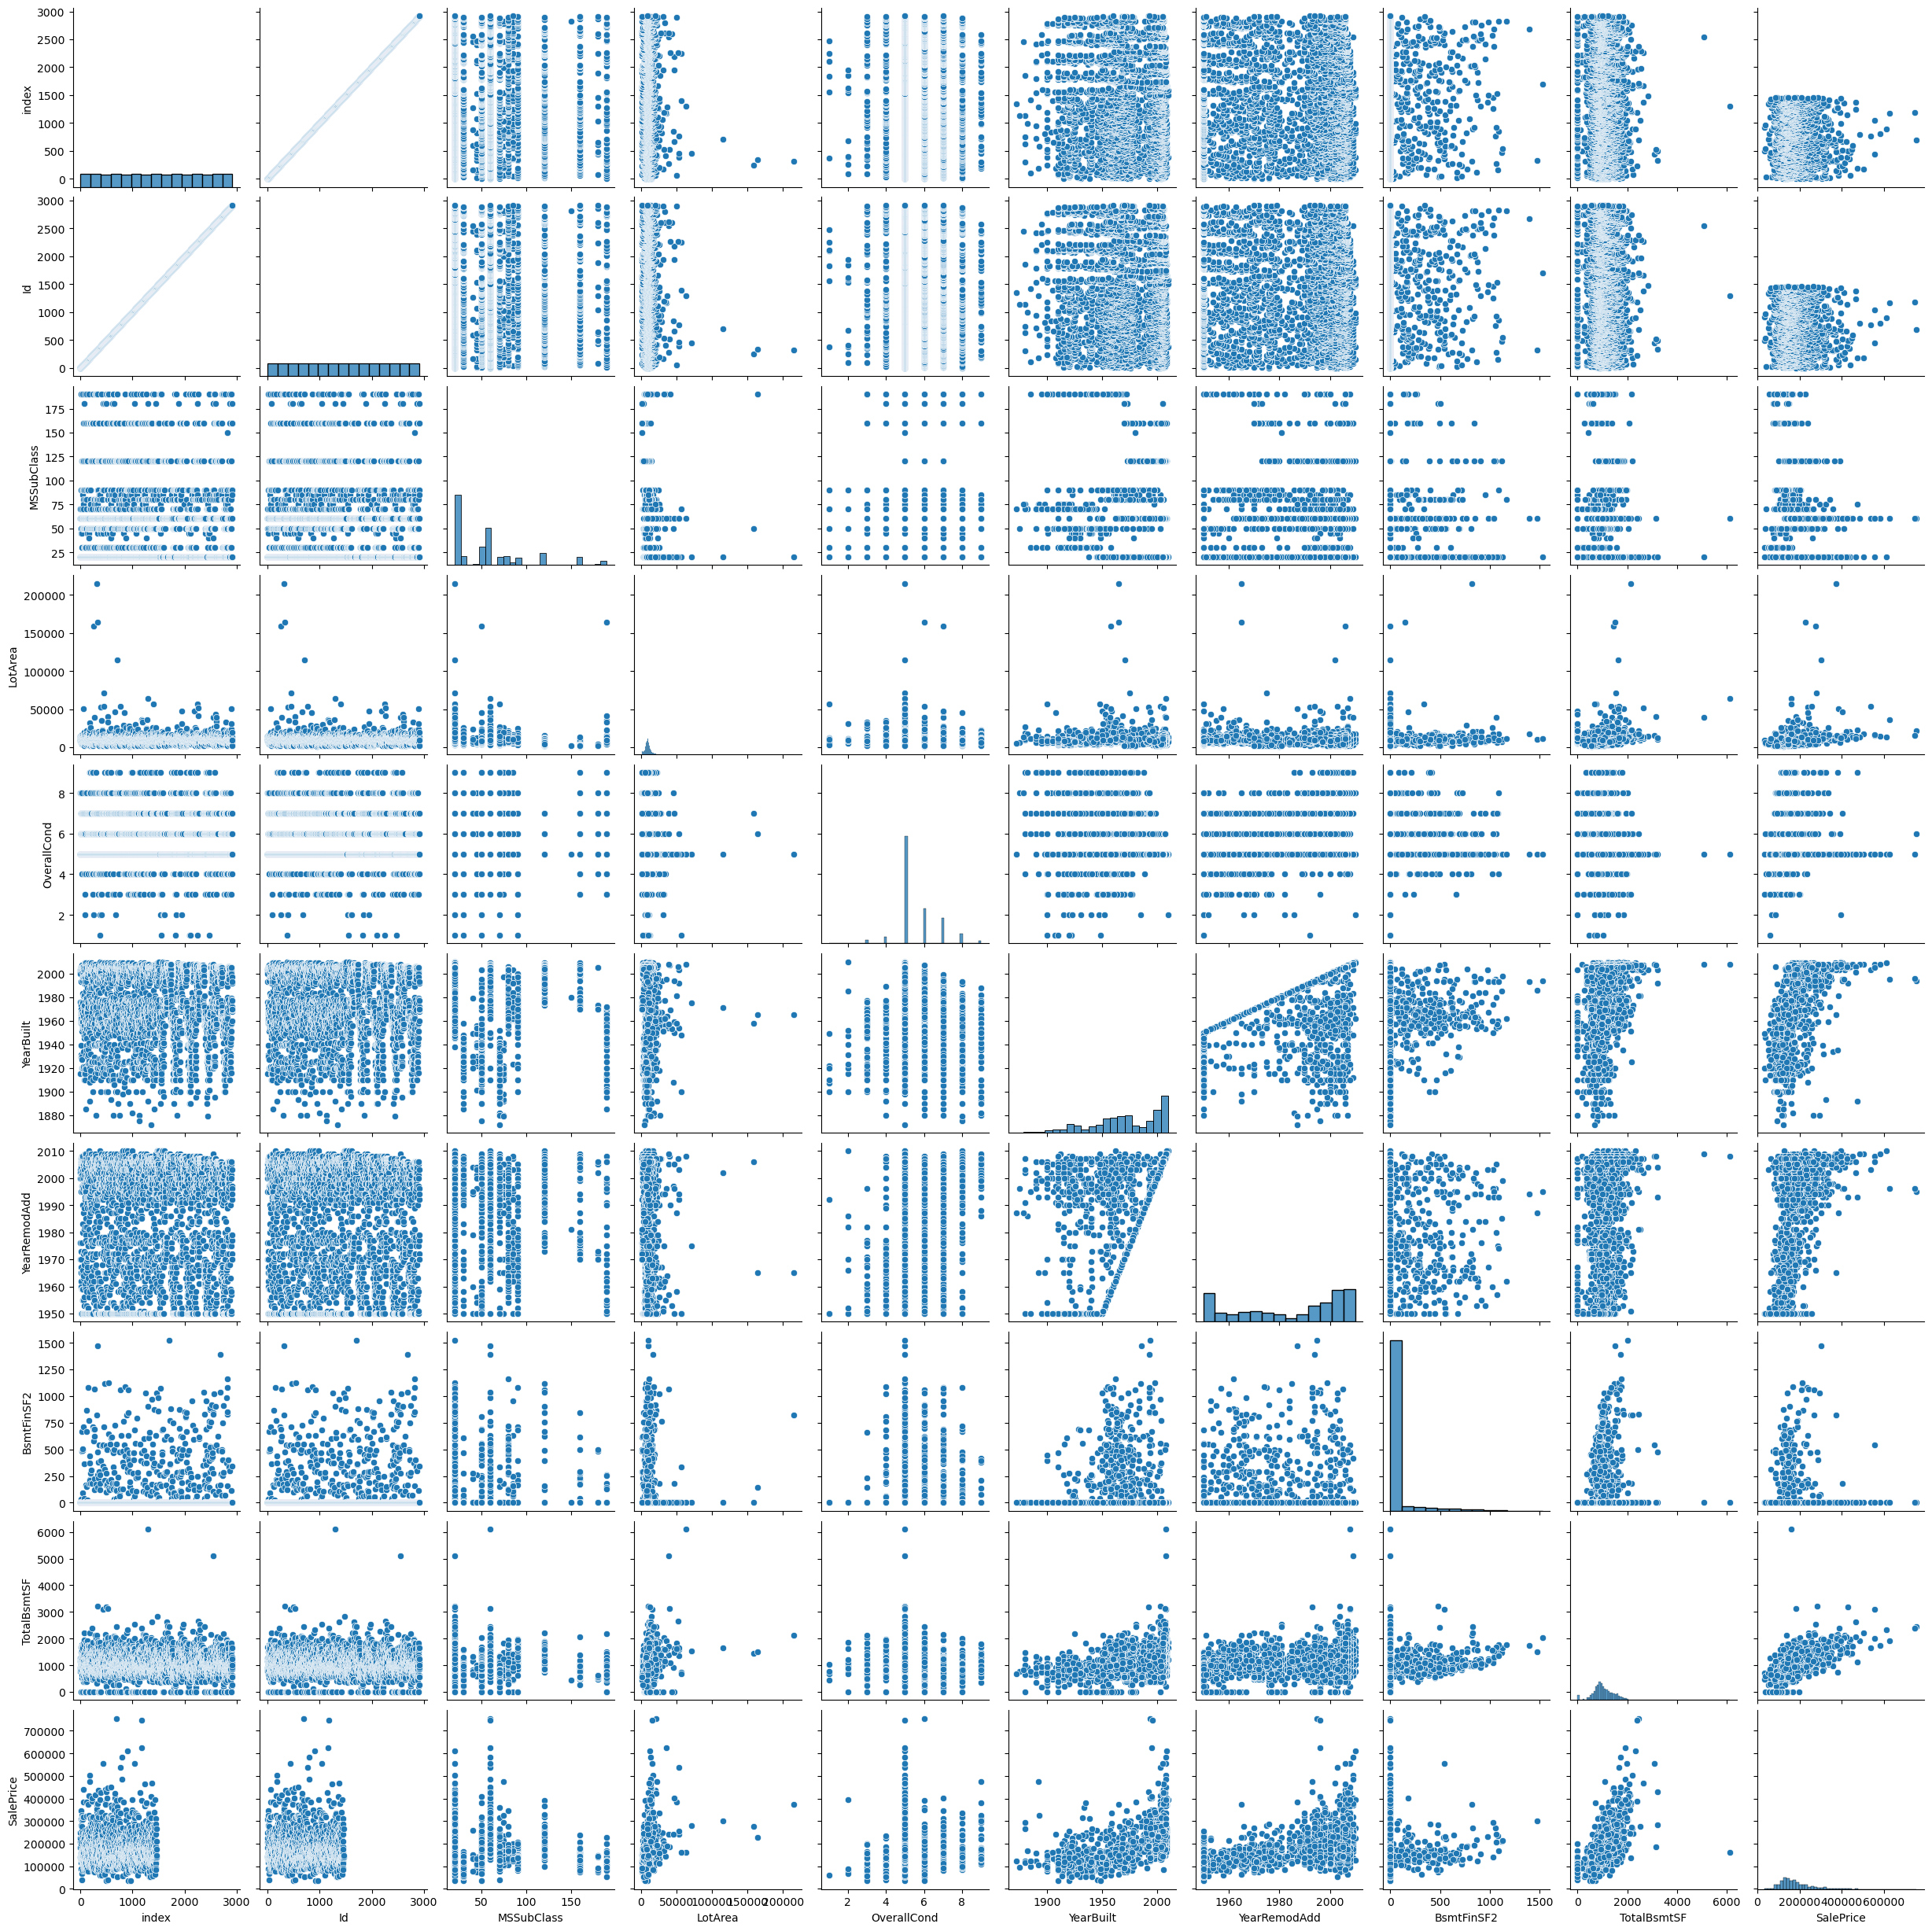

In [131]:
sns.pairplot(HouseDF)

C:\Users\hp\AppData\Local\Temp\ipykernel_8456\1168893419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HouseDF['SalePrice'])
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

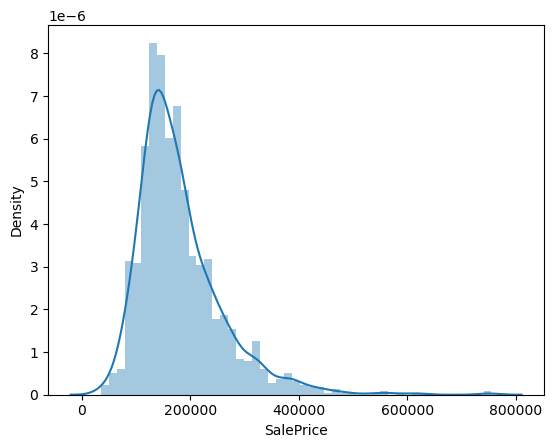

In [133]:
sns.distplot(HouseDF['SalePrice'])

<Axes: >

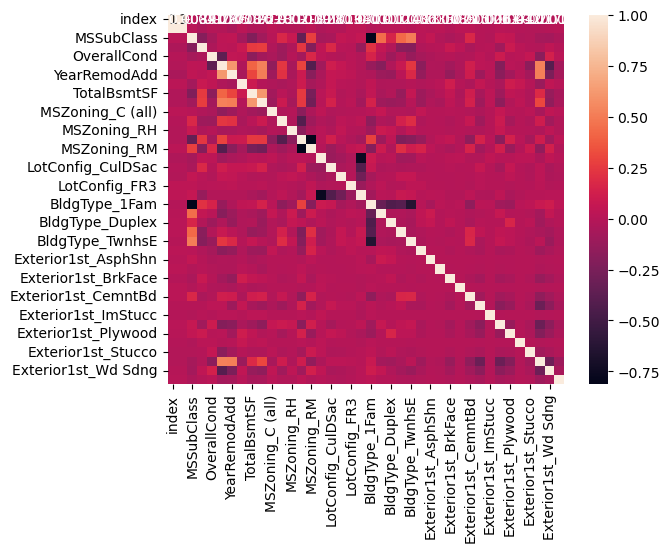

In [149]:
# Convert categorical data to numeric using one-hot encoding
HouseDF_encoded = pd.get_dummies(HouseDF)

# Compute the correlation matrix and plot the heatmap
corr_matrix = HouseDF_encoded.corr()
sns.heatmap(corr_matrix, annot=True)

In [153]:
X = HouseDF[['index', 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']]

y = HouseDF['SalePrice']


In [169]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Remove rows with NaN values in y
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Linear Regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Print the intercept
print(lm.intercept_)


-29917.200931245956


In [173]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df




,Coefficient
index,-546.048534
Id,-546.048534
MSSubClass,7997.831948
LotArea,227586.769637
OverallCond,41707.306425
YearBuilt,80124.351809
YearRemodAdd,50622.152843
BsmtFinSF2,-33317.937837
TotalBsmtSF,275325.966244


In [183]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn import metrics



In [193]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'elu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'elu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'elu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'elu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 37561655296.0000
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 31341617152.0000
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 16686999552.0000
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 17816115200.0000
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 11582422016.0000
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 15913327616.0000
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 12166258688.0000
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 15292095488.0000
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 11759241216.0000
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 13990174720.0000
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 14100035584.0000
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 15985576960.0000
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9511829504.0000
Epoch 14

In [197]:
print(model.get_weights())
coeff_df = pd.DataFrame(model.get_weights()[0], columns=['Coefficient'])
print(coeff_df)

[array([[ 0.17613006,  0.14871337,  0.09413918, -0.00751982,  0.14598621,
         0.07401446,  0.0450061 ,  0.01496352,  0.01375023,  0.11088824,
        -0.0197908 ,  0.16309844, -0.00868117,  0.0330567 ,  0.49140942,
         0.14106649, -0.135027  ,  0.0514721 ,  0.1677644 , -0.21495643,
        -0.03854347, -0.10459691,  0.05577578,  0.01408371, -0.2178205 ,
        -0.01407491, -0.0225706 ,  0.4024805 ,  0.08844531,  0.06293445,
        -0.174308  ,  0.02810062,  0.13828172, -0.02370695,  0.10576634,
         0.11037086,  0.06654643,  0.23202069,  0.16507839,  0.00605772,
         0.03729343,  0.0104522 ,  0.00363787,  0.14920679,  0.12298587,
         0.12739965,  0.12008004, -0.11252456, -0.03118219, -0.11236519,
        -0.14356333,  0.06474245,  0.01051785, -0.03265594, -0.08219914,
         0.01581533,  0.00687493, -0.01171819,  0.08700736, -0.04701449,
         0.11553485, -0.06134747,  0.07097007,  0.0358948 , -0.05456776,
         0.11314703, -0.18295908,  0.07741069, -0.

ValueError: Shape of passed values is (1, 200), indices imply (1, 1)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


ValueError: Data must be 1-dimensional, got ndarray of shape (1168, 1168) instead

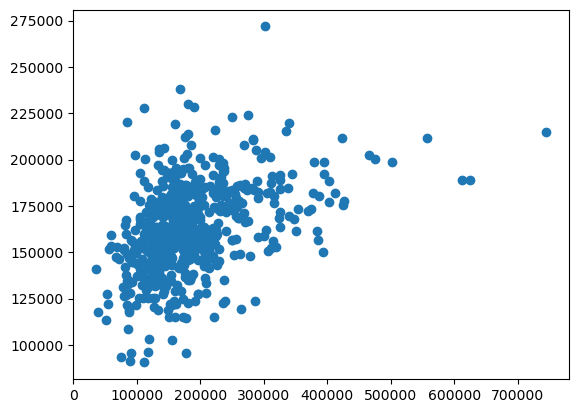

In [201]:

predictions = model.predict(X_test)
scale_factor = 1/0.02099517
y_predicted = predictions * scale_factor
plt.scatter(y_test, predictions)
sns.distplot((y_test-predictions), bins=50)

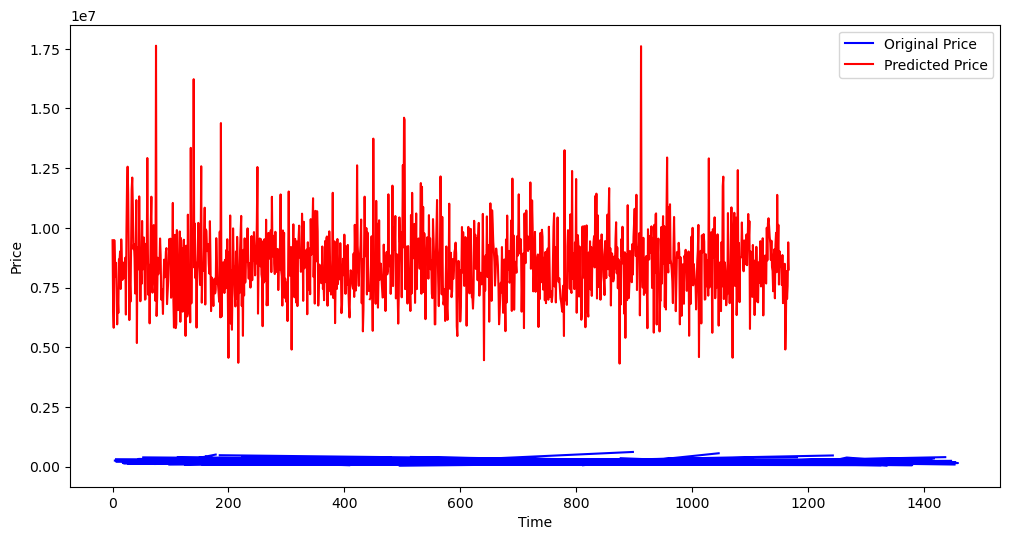

In [203]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [214]:
y_test_array = y_test.to_numpy().reshape(-1, 1)
predictions_array = predictions.reshape(-1, 1)

y_test_array = np.nan_to_num(y_test_array)
predictions_array = np.nan_to_num(predictions_array)

print('MAE:', metrics.mean_absolute_error(y_test_array, predictions_array))
print('MSE:', metrics.mean_squared_error(y_test_array, predictions_array))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_array, predictions_array)))

MAE: 120164.14848432149
MSE: 21712569551.439312
RMSE: 147351.85628772824
